In [1]:
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from user_params import UserParams

C:\Users\Cusse\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
params = UserParams()
all_files = glob.glob(f'{params.root_dir}/sdg_15_1_1_output/*.csv')
lad = gpd.read_file(f'{params.root_dir}/sdg_15_1_1_data/LADs/LAD_DEC_2021_UK_BFE.shp')[['LAD21CD', 'LAD21NM']]
lad = lad.set_index('LAD21CD')


In [3]:
dfs = []

for f in all_files:
    df = pd.read_csv(f, index_col=0)
    dfs.append(df)

In [4]:
wood_ts = pd.concat(dfs, axis=1)
wood_ts.columns = [col.split('_')[-1] for col in wood_ts.columns]


In [5]:
named_wood_ts = pd.concat([lad, wood_ts], axis=1).reset_index()
named_wood_ts = named_wood_ts.rename(columns={'index':  'LAD21CD'}).set_index('LAD21NM')

In [6]:
wood_ts_no_code = named_wood_ts[[col for col in named_wood_ts.columns if '20' in col]]
wood_ts_no_code

,2017,2018,2019,2020,2021
LAD21NM,,,,,
Hartlepool,8.909381,8.899129,8.461132,8.298312,8.297914
Middlesbrough,5.801441,5.852225,5.852481,5.852481,5.852481
Redcar and Cleveland,12.450676,12.449069,12.436699,12.433870,12.433875
Stockton-on-Tees,7.526627,7.635118,7.679417,7.774949,7.858836
Darlington,4.329069,4.329071,4.300833,4.483102,4.483054
...,...,...,...,...,...
NaN,6.938512,6.938928,NaN,NaN,NaN
NaN,13.871531,NaN,NaN,NaN,NaN
NaN,18.608548,NaN,NaN,NaN,NaN


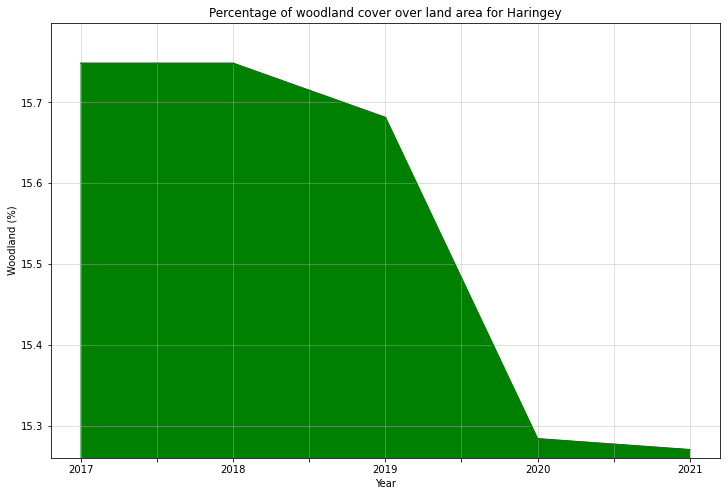

In [29]:
lad_name = 'Haringey'

series = wood_ts_no_code.loc[lad_name][[col for col in wood_ts_no_code.columns if "change" not in col]]

series.plot(style=['g'], figsize=(12, 8))

plt.title(f'Percentage of woodland cover over land area for {lad_name}')
plt.xlabel('Year')
plt.ylabel('Woodland (%)')

plt.fill_between(series.index, series.values, color='g')
plt.ylim([series.min()-0.01, series.max()+0.05])
plt.grid(alpha=0.5)
plt.show()

In [8]:
wood_ts_no_code['change'] = wood_ts_no_code['2021'] - wood_ts_no_code['2017']
wood_ts_no_code['change'].nlargest(20)

LAD21NM
East Renfrewshire       4.121111
Richmond upon Thames    3.504955
East Ayrshire           1.597008
Clackmannanshire        1.584369
Stirling                1.564474
Scottish Borders        1.379095
Rossendale              1.325297
Inverclyde              1.099872
Epsom and Ewell         1.081307
North Ayrshire          1.054298
Blaenau Gwent           1.045676
Stoke-on-Trent          0.930113
Calderdale              0.866325
South Ayrshire          0.843220
Renfrewshire            0.808095
Midlothian              0.788668
West Lothian            0.777016
City of Edinburgh       0.769140
Reigate and Banstead    0.699942
Kingston upon Thames    0.656037
Name: change, dtype: float64

In [9]:
wood_ts_no_code['change'].nsmallest(20)

LAD21NM
Hastings                -4.261260
East Dunbartonshire     -1.850634
Merthyr Tydfil          -1.498161
Crawley                 -1.230260
Cannock Chase           -0.811653
Carlisle                -0.790802
Islington               -0.651950
Greenwich               -0.638477
Mansfield               -0.614554
Hartlepool              -0.611467
Tonbridge and Malling   -0.570078
Dartford                -0.484557
Haringey                -0.478067
Wyre Forest             -0.470525
Camden                  -0.466811
Neath Port Talbot       -0.460735
Ipswich                 -0.433416
Southend-on-Sea         -0.387153
Three Rivers            -0.382770
Newport                 -0.372372
Name: change, dtype: float64